In [6]:
!pip install cython matplotlib pystan

  Using cached https://files.pythonhosted.org/packages/49/f9/106f3db81cf4da1be937a11b63f400d072718662f3fd1349ea7f0458aa0f/pystan-2.18.0.0-cp36-cp36m-manylinux1_x86_64.whl
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
bleach 2.1.3 has requirement html5lib!=1.0b1,!=1.0b2,!=1.0b3,!=1.0b4,!=1.0b5,!=1.0b6,!=1.0b7,!=1.0b8,>=0.99999999pre, but you'll have html5lib 0.9999999 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/83/a1/a39be1675a62597e4c0d4fdaeb65b14752b8aa8afc92e90edd91614353ab/fbprophet-0.3.post2.tar.gz
  Running setup.py bdist_wheel for fbprophet ... done
  Stored in directory: /home/iw/.cache/pip/wheels/f5/21/b3/127d7d3dd12f8311da7d5af1944976f53e121ce88899697c6f
Successfully built fbprophet
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
bleach 2.1.3 has requirement html5lib!=1.0b1,!=1.0b2,!=1.0b3,!=1.0b4,!=1.0b5,!=1.0b6,!=1.0b7,!=1.0b8,>=0.99999999pre, but you'll have html5lib 0.9999999 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [9]:
inputs = pd.read_csv("data/inputs.csv")

In [12]:
inputs["timeStamp"] = inputs["timeStamp"].apply(pd.to_datetime)

In [11]:
targets = pd.read_csv("data/targets.csv", skiprows=1, names=['targets'])

In [13]:
df = inputs.join(targets)

In [14]:
df

,timeStamp,meanDraft,meanActualRPM1,stdRudderAngle,stdDraft,meanActualPitch1,meanWaterDepth,stdTrimAngle,meanAcceleration,meanRudderAngle,meanWaterSpeed,meanLongitudinalWind,meanTransversalWind,meanTrim,targets
0,2016-09-01 00:03:24,7.0974,95.2114,1.4233,0.3458,93.1591,35.0000,0.1393,0.0204,1.4042,19.6400,40.0344,8.3034,-0.6858,17004.0000
1,2016-09-01 00:08:24,7.1094,95.1560,1.3687,0.3593,93.1651,34.5714,0.1689,0.0203,1.2653,19.7467,38.7960,6.3504,-0.6599,16958.2852
2,2016-09-01 00:13:24,7.1349,93.8442,1.0032,0.3495,93.1600,34.8571,0.1428,-0.0000,1.0399,19.7533,38.6185,5.5219,-0.6470,16453.1992
3,2016-09-01 00:18:24,7.1388,93.5767,0.8556,0.3253,93.1674,34.5714,0.1459,-0.0608,1.0384,19.6583,37.8166,5.5983,-0.6735,16033.0000
4,2016-09-01 00:23:24,7.1180,93.6600,0.8701,0.3441,93.1560,34.5714,0.1641,-0.0204,1.1946,19.4700,38.1040,6.7381,-0.7097,16028.0000
5,2016-09-01 00:28:24,7.1498,93.6106,1.2866,0.3639,93.1600,33.4286,0.1475,0.0610,1.2911,19.5417,39.1515,7.0132,-0.6141,16024.3330
6,2016-09-01 00:33:24,7.1261,93.4111,1.8822,0.3542,93.1465,31.4286,0.2129,0.0202,1.3890,19.5317,39.3267,6.8969,-0.5410,16236.5000
7,2016-09-01 00:38:24,7.1412,93.5906,1.8814,0.4211,93.1617,31.8571,0.1764,0.0611,0.9509,19.6883,37.3358,9.7292,-0.5696,16323.4443
8,2016-09-01 00:43:24,7.1510,93.6472,1.9611,0.3576,93.1578,31.7143,0.1623,-0.0204,1.8177,19.5867,38.9185,6.0174,-0.6088,16012.5996
9,2016-09-01 00:48:24,7.1206,93.6326,1.3299,0.4290,93.1524,32.0000,0.1436,0.0610,0.6929,19.8333,40.0808,3.3538,-0.5138,16350.7139


In [15]:
df = df.rename(columns={'timeStamp': 'ds',
                        'targets': 'y'})

In [18]:
df = df[['ds', 'y']]

In [19]:
df.head()

,ds,y
0,2016-09-01 00:03:24,17004.0000
1,2016-09-01 00:08:24,16958.2852
2,2016-09-01 00:13:24,16453.1992
3,2016-09-01 00:18:24,16033.0000
4,2016-09-01 00:23:24,16028.0000


In [16]:
my_model = Prophet(interval_width=0.95)

In [20]:
my_model.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [22]:
future_dates = my_model.make_future_dataframe(periods=48, freq='H')
future_dates.tail()

,ds
18230,2016-12-02 19:56:09
18231,2016-12-02 20:56:09
18232,2016-12-02 21:56:09
18233,2016-12-02 22:56:09
18234,2016-12-02 23:56:09


In [23]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18230,2016-12-02 19:56:09,6973.104611,135.040766,13297.007358
18231,2016-12-02 20:56:09,6950.118948,-321.633652,14475.450629
18232,2016-12-02 21:56:09,7055.239474,35.168357,14161.997915
18233,2016-12-02 22:56:09,7199.603808,225.742631,14415.158030
18234,2016-12-02 23:56:09,7230.571913,34.662433,14224.580457


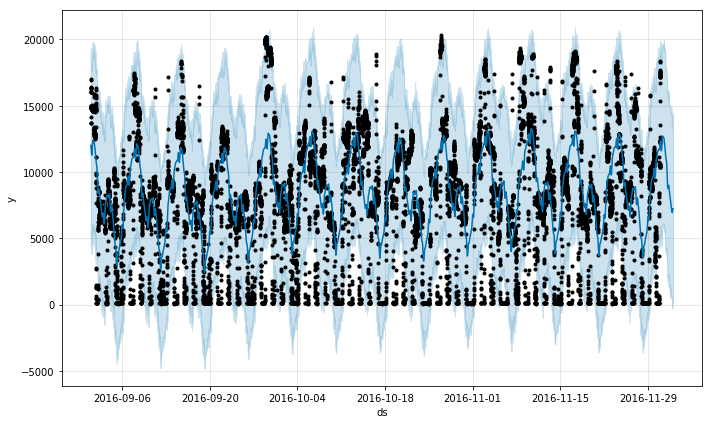

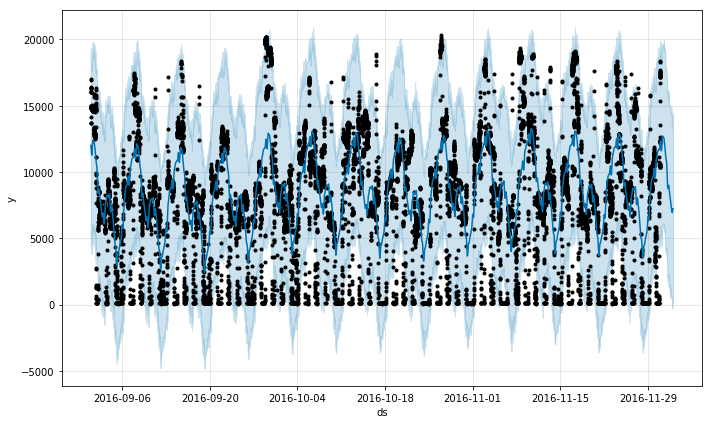

In [24]:
my_model.plot(forecast,
              uncertainty=True)